In [1]:
import pandas as pd

In [2]:
BASE_FOLDER = './outputs/evaluation'
PREFIX = 'oc_2way_500k_steps'
TRAFFIC = 'custom-2way-single-intersection'

In [7]:
BASE_FOLDER = './outputs/evaluation'
PREFIX = 'oc_single_4mil_steps'
TRAFFIC = 'custom-single-intersection'

In [2]:
# Single episode

In [8]:
df_single_episode = pd.read_csv(f'{BASE_FOLDER}/{PREFIX}_1_episode_{TRAFFIC}.csv')
df_single_episode = df_single_episode.set_index('step')
df_single_episode = df_single_episode.drop(columns=['cumulative_reward'])

<Axes: xlabel='step'>

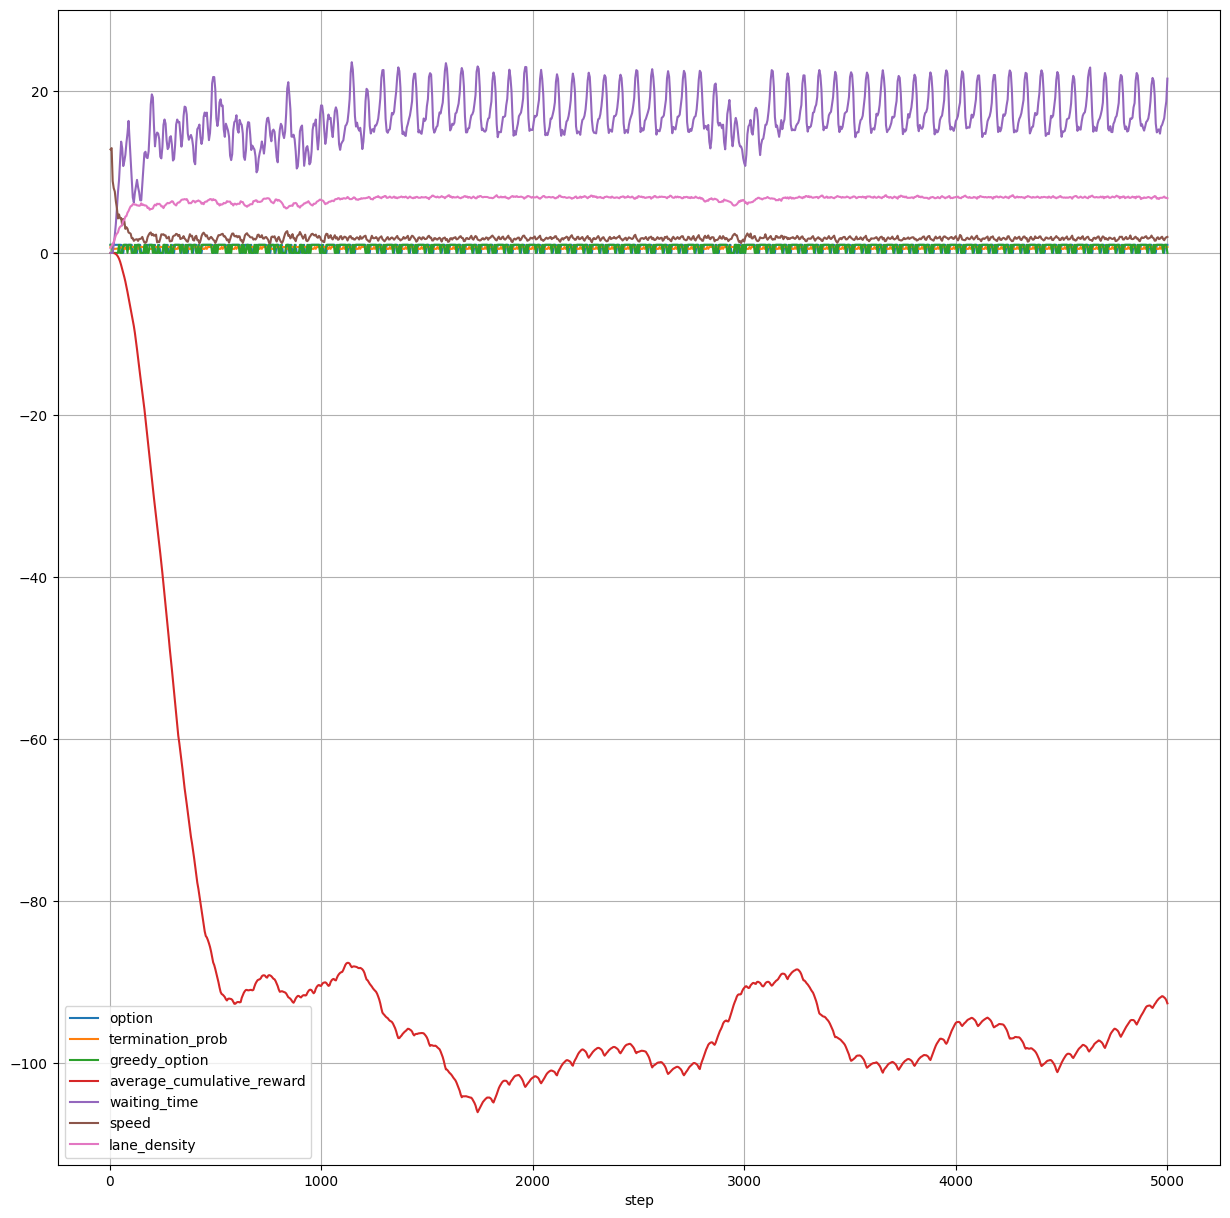

In [4]:
df_single_episode.plot(grid=True, figsize=(15,15))

<Axes: xlabel='step'>

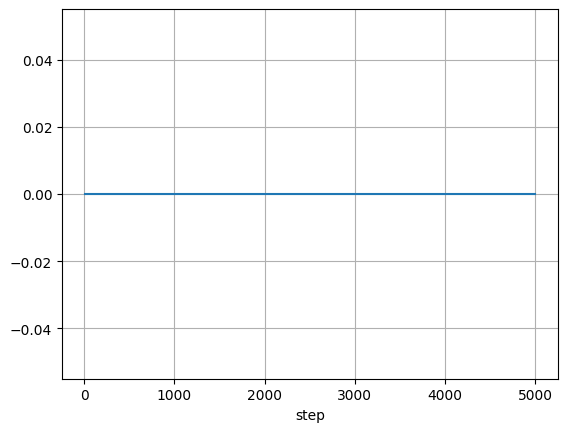

In [9]:
df_single_episode.option.plot(grid=True)

In [7]:
# Verify that the metrics are stable across multiple episodes

In [11]:
df_multiple_episodes = pd.read_csv(f'{BASE_FOLDER}/{PREFIX}_100_episode_custom-single-intersection.csv')
df_multiple_episodes = df_multiple_episodes.set_index('episode')
# df_multiple_episodes = df_multiple_episodes.drop(columns=['cumulative_reward'])

FileNotFoundError: [Errno 2] No such file or directory: './outputs/evaluation/oc_2way_500k_steps_100_episode_custom-single-intersection.csv'

<Axes: xlabel='episode'>

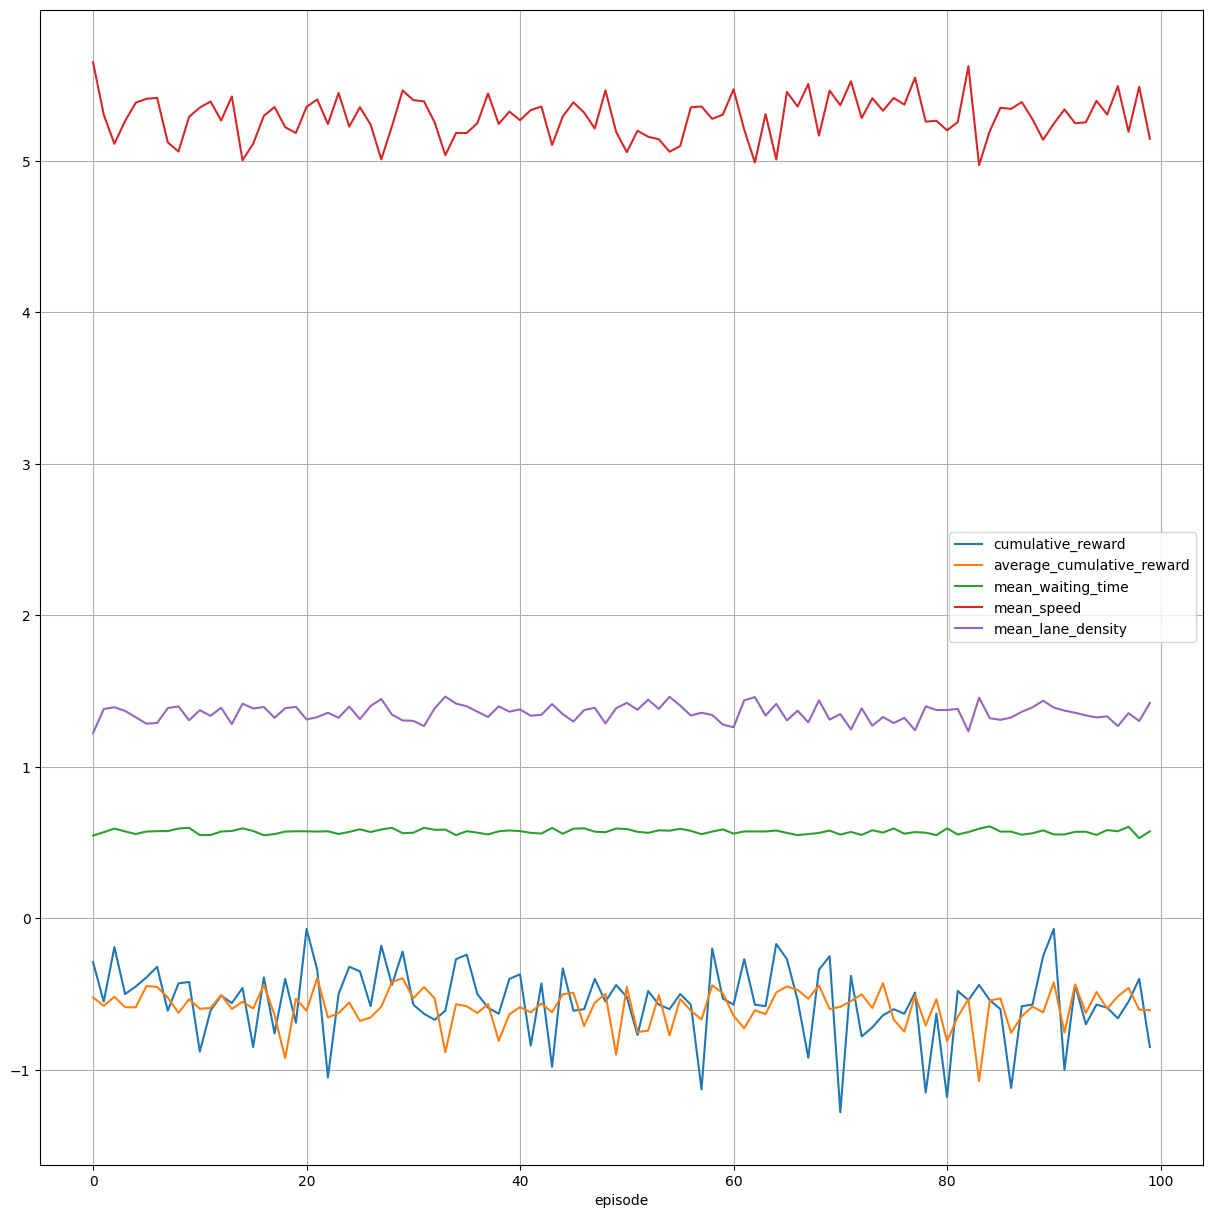

In [37]:
df_multiple_episodes.plot(grid=True, figsize=(15,15))

<Axes: xlabel='episode'>

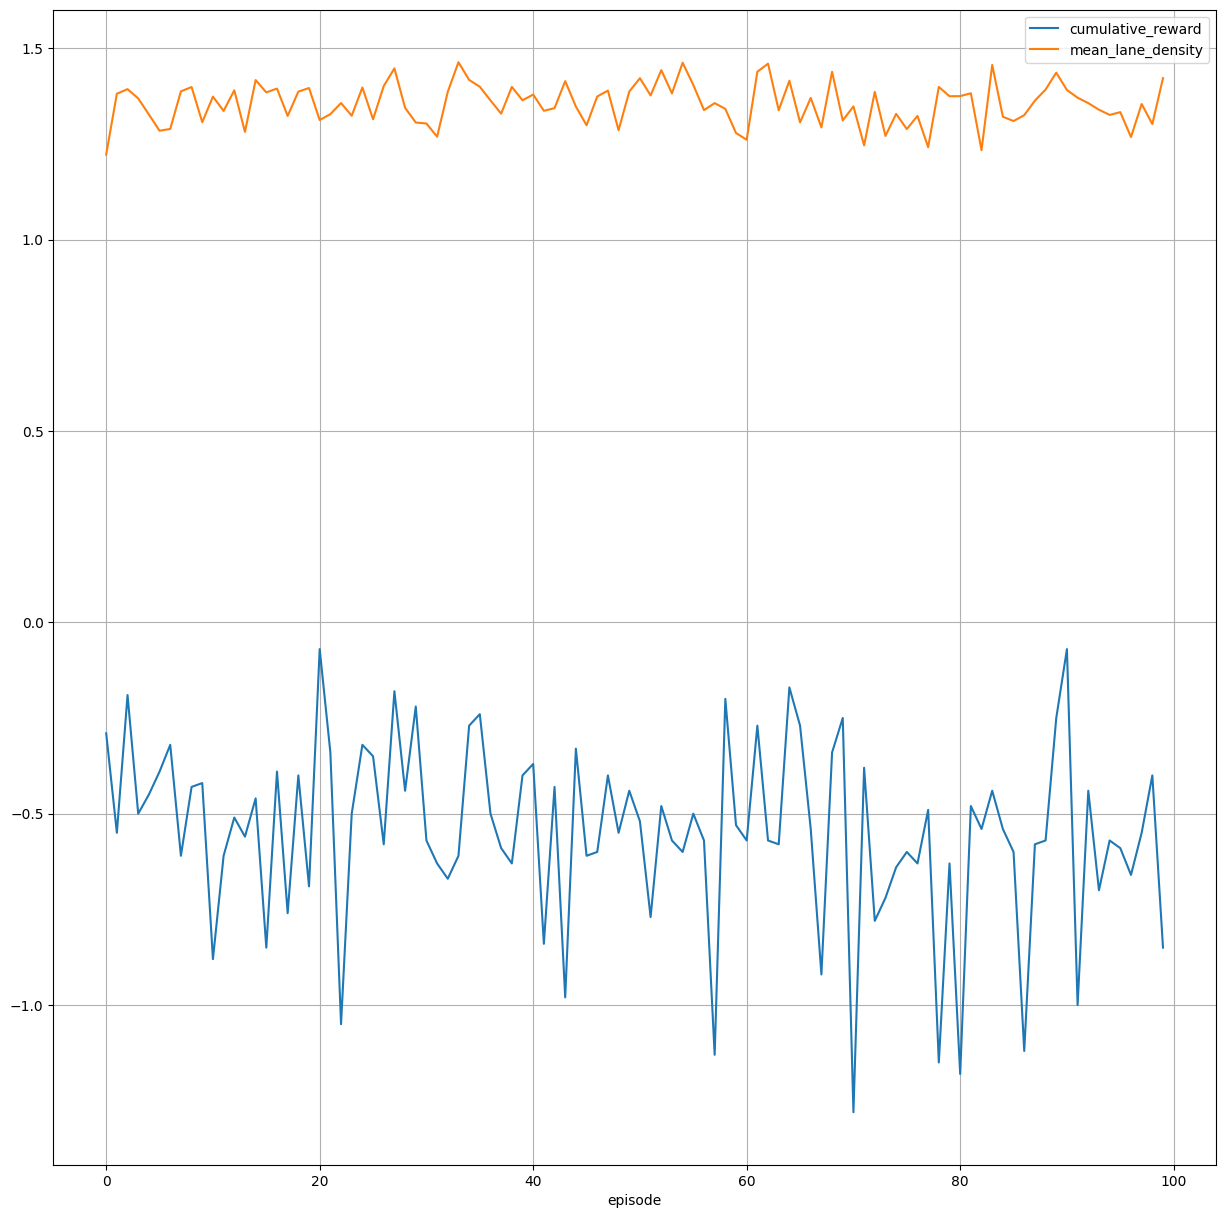

In [38]:
df_multiple_episodes[['cumulative_reward', 'mean_lane_density']].plot(grid=True, figsize=(15,15))

In [22]:
df_multiple_episodes[['cumulative_reward', 'mean_lane_density']].mean()

cumulative_reward   -0.606900
mean_lane_density    1.384334
dtype: float64

In [39]:
df_multiple_episodes[['cumulative_reward', 'mean_lane_density']].mean()

cumulative_reward   -0.547500
mean_lane_density    1.355185
dtype: float64